### Dataset creation and processing

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd 
import numpy as np
import warnings
import time
import seaborn as sns
import matplotlib.pyplot as plt
import random

df = pd.read_csv('data.csv')
df.head(1)

,Unnamed: 0,Name,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1,...,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1,catagory,description,sub_catagory
0,0,Summer Squash Salad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,"Key Ingredients: white balsamic vinegar, lemon...",healthy


### Basic cleaning

Removing duplicate columns

In [2]:
l = ['Name','catagory','description','sub_catagory']
drop = []
columns = list(df.columns)
for col in columns:
    if col not in l:
        drop.append(col)
if drop!=[]:
    df = df.drop(drop,axis=1)


### Adding a column 'veg/nonveg'

In [3]:
l = ['chicken','wings','meat','salmon','salmons','cob','cobs','kebab','kebabs','fish','snake','gosht','bacon','mutton','lamb','egg','eggs']
nv = ['chicken','meat']
vg_nv = []

for name,cat in zip(df.Name,df.catagory):
    n = name.split()
    f=0
    if cat in nv:
        vg_nv.append('non-veg')
    else: 
        for i in n:
            if i.lower() in l:
                f=1
        if f==1:
            vg_nv.append('non-veg')
        else:
            vg_nv.append('veg')
            
df['Veg_Non'] = vg_nv
df.head()

,Name,catagory,description,sub_catagory,Veg_Non
0,Summer Squash Salad,NaN,"Key Ingredients: white balsamic vinegar, lemon...",healthy,veg
1,Chicken Minced Salad,NaN,"Key Ingredients: olive oil, chicken mince, gar...",healthy,non-veg
2,Sweet Chilli Almonds,NaN,"Key Ingredients: almonds whole, egg white, cur...",healthy,veg
3,Tricolour Salad,NaN,"Key Ingredients: vinegar, honey/sugar, soy sau...",healthy,veg
4,Sakkarai Pongal,NaN,"Key Ingredients: rice, yellow moong dal, milk,...",healthy,veg


veg        1646
non-veg     305
Name: Veg_Non, dtype: int64


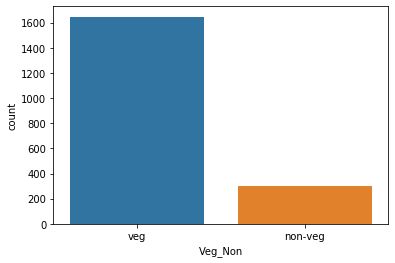

In [4]:
print(df.Veg_Non.value_counts())
sns.countplot(df.Veg_Non)

### Adding a column 'review'

In [5]:
review = []
for i in range(df.shape[0]):
    review.append(random.randint(1,5))
df['Review'] = review
df.head()

,Name,catagory,description,sub_catagory,Veg_Non,Review
0,Summer Squash Salad,NaN,"Key Ingredients: white balsamic vinegar, lemon...",healthy,veg,5
1,Chicken Minced Salad,NaN,"Key Ingredients: olive oil, chicken mince, gar...",healthy,non-veg,3
2,Sweet Chilli Almonds,NaN,"Key Ingredients: almonds whole, egg white, cur...",healthy,veg,2
3,Tricolour Salad,NaN,"Key Ingredients: vinegar, honey/sugar, soy sau...",healthy,veg,2
4,Sakkarai Pongal,NaN,"Key Ingredients: rice, yellow moong dal, milk,...",healthy,veg,1


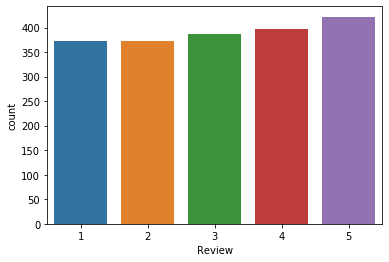

In [6]:
sns.countplot(df.Review)

### Adding a column 'Nutrient'

In [7]:
class Nutrient:
    
    def __init__(self,df):
        self.df = df
        pass
    
    def Iron(self):
        url = 'https://www.redcrossblood.org/donate-blood/blood-donation-process/before-during-after/iron-blood-donation/iron-rich-foods.html'
        data = requests.get(url)
        soup = BeautifulSoup(data.content,'html.parser')
        s = soup.findAll('div',{'class':'par-33'})
        l=[]
        iron = []
        for html in s:
            l = html.ul.text.split('\n')
            l = l[1:-1]
            iron = iron+l
        iron = ['red meat', 'poultry', 'eggs','egg', 'fruits', 'green' , 'fortified bread'] + iron
        return iron
    
    def Calcium(self):
        url = 'https://www.medicalnewstoday.com/articles/322585.php#non-dairy-sources-of-calcium'
        data = requests.get(url)
        soup = BeautifulSoup(data.content,'html.parser')
        s = soup.findAll('h3')
        calcium = []
        for i in s[:-1]:
            calcium.append(i.text.split('.')[1].strip())
        calcium =['keer','yogurt', 'cheese', 'milk', 'salmon', 'leafy green','Cappuccino'] + calcium
        return calcium
    
    def Sodium(self):
        url = 'https://www.healthline.com/nutrition/foods-high-in-sodium#section1'
        data = requests.get(url)
        soup = BeautifulSoup(data.content,'html.parser')
        s = soup.findAll('div',{'class':'css-0'})
        sodium = []
        for i in s[:-1]:
            sodium.append(i.a.text.split('.')[1].strip())
        sodium = ['salt', 'soy sauce', 'vegetables'] + sodium
        return sodium
    
    def Iodine(self):
        url = 'https://www.healthline.com/nutrition/iodine-rich-foods#section1'
        data = requests.get(url)
        soup = BeautifulSoup(data.content,'html.parser')
        s = soup.findAll('div',{'class':'css-0'})
        iodine = []
        for i in s[:-1]:
            iodine.append(i.a.text.split('.')[1].strip())
        iodine = [ 'salt', 'seafood'] + iodine
        return iodine
    
    def Magnesium(self):
        url = 'https://www.healthline.com/nutrition/10-foods-high-in-magnesium#section11'
        data = requests.get(url)
        soup = BeautifulSoup(data.content,'html.parser')
        s = soup.findAll('div',{'class':'css-0'})
        magnesium = []
        for i in s[:-1]:
            magnesium.append(i.a.text.split('.')[1].strip())
        magnesium =['chocolate','Spinach', 'broccoli', 'legumes', 'seeds'] + magnesium
        return magnesium
    
    def Selenium(self):
        url = 'https://www.healthline.com/health/selenium-foods#cashews'
        data = requests.get(url)
        soup = BeautifulSoup(data.content,'html.parser')
        s = soup.findAll('div',{'class':'css-0'})
        selenium = []
        for i in s[2:]:
            selenium.append(i.a.text.split('.')[1].strip())
        selenium = ['banana','Organ meat', 'seafood', 'walnuts'] + selenium
        return selenium
    
    def Protien(self):
        url = 'https://www.healthline.com/nutrition/20-delicious-high-protein-foods'
        data = requests.get(url)
        soup = BeautifulSoup(data.content,'html.parser')
        s = soup.findAll('div',{'class':'css-0'})
        protien = []
        for i in s[:-1]:
            protien.append(i.a.text.split('.')[1].strip())
        protien = protien + ['cookie','cookies','mutton','meat','gosht','Chicken','Wings','Meat','Salmon','Cob','Kebab','Fish','Snake','Gosht','Bacon','Mutton','Lamb']
        url = 'https://www.medicalnewstoday.com/articles/321522.php#high-protein-foods-for-weight-loss'
        data = requests.get(url)
        soup = BeautifulSoup(data.content,'html.parser')
        s = soup.findAll('p')
        for p in s:
            if p.strong:
                protien.append(p.strong.text.split('.')[1].strip())
        return protien
    
    def Carbohydrates(self): 
        url = 'https://www.healthline.com/nutrition/12-healthy-high-carb-foods'
        data = requests.get(url)
        soup = BeautifulSoup(data.content,'html.parser')
        s = soup.findAll('div',{'class':'css-0'})
        carb = []
        for i in s[:-1]:
            carb.append(i.a.text.split('.')[1].strip())
        url = 'https://www.medicalnewstoday.com/articles/323110.php#dried-fruits'
        data = requests.get(url)
        soup = BeautifulSoup(data.content,'html.parser')
        s = soup.findAll('h3')
        for i in s[:-1]:
            carb.append(i.text.split('.')[1].strip())
        url = 'https://www.tuasaude.com/en/high-carb-foods/'
        data = requests.get(url)
        soup = BeautifulSoup(data.content,'html.parser')
        s = soup.findAll('td')
        for i in range(3,len(s),3):
            carb.append(s[i].text.strip())
        carb = carb +['Poha','aloo','buttter','ghee','rice','biryani','pulao']
        return carb
    
    def Vitamin_c(self):
        Vitamin_C = ['margarita','Citrus fruit',' potatoes', 'broccoli', 'bell peppers', 'spinach','strawberries','tomatoes', 'Brussels sprouts']
        return Vitamin_C
    
    def Vitamin_A(self):
        return ['beef', 'liver', 'eggs','egg', 'shrimp', 'fish', 'fortified milk',' sweet potatoes', 'carrots', 'pumpkins', 'spinach',' mangoes']

    def Vitamin_D(self):
        return ['milk' ,'cereals',' fatty','fish']

    def Vitamin_E(self):
        return ['vegetables oils', 'leafy green', 'whole grains', 'nuts']

    def Vitamin_K(self):
        return ['Cabbage', 'eggs','egg',' milk', 'spinach', 'broccoli',' kale']
    
    def Chloride(self):
        return ['salt']

    def Potassium(self):
        return ['cake','meat', 'milk', 'fruits', 'vegetables', 'grains', 'legumes']
  
    def Chromium(self):
        return ['meat', 'poultry', 'fish', 'nuts', 'cheese']

    def Copper(self):
        return ['shellfish', 'nuts', 'seeds', 'beans',' prunes']

    def Fluoride(self):
        return ['fish', 'teas']
    
    def Manganese(self):
        return ['nuts', 'legumes', 'whole grains', 'tea','coffee','chai']

    def Zinc(self):
        return ['meat', 'shellfish', 'legumes', 'whole grains']

    def Fiber(self):
        return ['Salad','salad']

    def Phosphorus(self):
        return ['paneer','kebab']
    
    def apply(self):
        Nutritions = {'Phosphorus':self.Phosphorus(),'Fiber':self.Fiber(),
                  'Vitamin_c':self.Vitamin_c(),'Vitamin_A':self.Vitamin_A(),'Vitamin_D':self.Vitamin_D(),'Vitamin_E':self.Vitamin_E(),'Vitamin_K':self.Vitamin_K(),
                 'Calcium':self.Calcium(),'Chloride':self.Chloride(),'Magnesium':self.Magnesium(),'Potassium':self.Potassium(),'Sodium':self.Sodium(),
                  'Chromium':self.Chromium(),'Copper':self.Copper(),'Fluoride':self.Fluoride(),
                  'Iodine':self.Iodine(),'Iron':self.Iron(),'Manganese':self.Manganese(),'Selenium':self.Selenium(),'Zinc':self.Zinc(),'Protien':self.Protien(),'Carbohydrates':self.Carbohydrates()}

        
        nutrient = []
        tokens = []
        for i,j in zip(df.Name,df.description):
            N = [k.lower() for k in i.split()] 
            try:
                D = [k.lower() for k in j.split()]
            except:
                D = []
                
            D = N+D[2:]
            tokens.append(D)
                  

        for value in tokens:
            f=1
            for key,values in Nutritions.items():
                for i in [k.lower() for k in values]:
                    if i in value and f==1:
                        nutrient.append(key)
    
                        f=0
                    
            if f==1:
                nutrient.append(np.nan)
                f=0


                        

        self.df['Nutrient'] = nutrient

ob = Nutrient(df)
ob.apply()



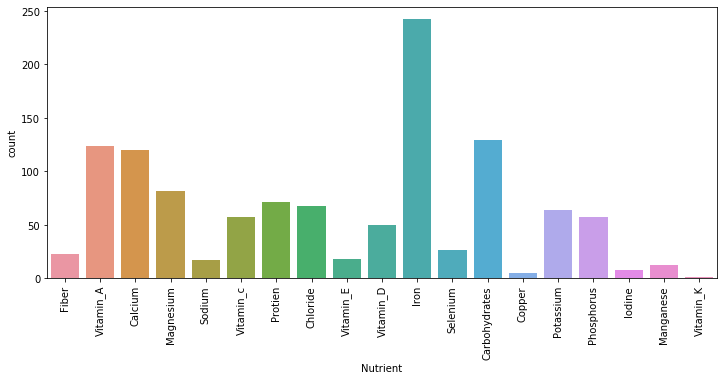

In [8]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=90)
sns.countplot(df.Nutrient)

lets see data with nutrient that isnt been assigned

In [9]:
df[df.Nutrient.isnull()].shape
df.catagory.unique()

array([nan, 'snacks', 'chicken', 'meat', 'rice', 'bread'], dtype=object)

In [10]:
df.sub_catagory.unique()

array(['healthy', nan, 'vegetarian', 'beverage', 'seafood', 'desserts',
       'dinner', 'christmas', 'diwali', 'durga puja', 'easter', 'eid',
       'holi', 'navratri', 'kids', 'winter', 'breakfast'], dtype=object)

That's too much of data lets fill it

In [11]:
for i in range(df.shape[0]):
    if df.loc[i,'catagory']=='meat' and df.loc[i,'Nutrient'] == 'none':
        df.loc[i,'Nutrient'] = 'Protien'
        
for i in range(df.shape[0]):
    if df.loc[i,'catagory']=='rice' and df.loc[i,'Nutrient'] == 'none': 
        df.loc[i,'Nutrient'] = 'Carbohydrates'
        
for i in range(df.shape[0]):
    if df.loc[i,'catagory']=='chicken'and df.loc[i,'Nutrient'] == 'none':
        df.loc[i,'Nutrient'] = 'Protien'
        
for i in range(df.shape[0]):
    if df.loc[i,'sub_catagory']=='seafood'and df.loc[i,'Nutrient'] == 'none':
        df.loc[i,'Nutrient'] = 'Vitamin_A'

for i in range(df.shape[0]):
    if df.loc[i,'catagory']=='bread'and df.loc[i,'Nutrient'] == 'none':
        df.loc[i,'Nutrient'] = 'Protien'
        
for i in range(df.shape[0]):
    if df.loc[i,'sub_catagory']=='vegetarian'and df.loc[i,'Nutrient'] == 'none':
        df.loc[i,'Nutrient'] = 'Calcium'        

for i in range(df.shape[0]):
    if df.loc[i,'sub_catagory']=='navratri'and df.loc[i,'Nutrient'] == 'none':
        df.loc[i,'Nutrient'] = 'Fibre'      
        
for i in range(df.shape[0]):
    if df.loc[i,'sub_catagory']=='diwali'and df.loc[i,'Nutrient'] == 'none':
        df.loc[i,'Nutrient'] = 'Carbohydrate' 

for i in range(df.shape[0]):
    if df.loc[i,'sub_catagory']=='holi'and df.loc[i,'Nutrient'] == 'none':
        df.loc[i,'Nutrient'] = 'Carbohydrate'
        
for i in range(df.shape[0]):
    if df.loc[i,'sub_catagory']=='breakfast'and df.loc[i,'Nutrient'] == 'none':
        df.loc[i,'Nutrient'] = 'Iron'  
        
for i in range(df.shape[0]):
    if df.loc[i,'sub_catagory']=='healthy'and df.loc[i,'Nutrient'] == 'none':
        df.loc[i,'Nutrient'] = 'Fibre'     
        
for i in range(df.shape[0]):
    if df.loc[i,'sub_catagory']=='kids'and df.loc[i,'Nutrient'] == 'none':
        df.loc[i,'Nutrient'] = 'Calcium'    
        
for i in range(df.shape[0]):
    if df.loc[i,'sub_catagory']=='eid'and df.loc[i,'Nutrient'] == 'none':
        df.loc[i,'Nutrient'] = 'Protien'
        
for i in range(df.shape[0]):
    if df.loc[i,'sub_catagory']=='christmas'and df.loc[i,'Nutrient'] == 'none':
        df.loc[i,'Nutrient'] = 'Protien Carbohydrates'       

for i in range(df.shape[0]):
    if df.loc[i,'sub_catagory']=='dinner'and df.loc[i,'Nutrient'] == 'none':
        df.loc[i,'Nutrient'] = 'Protien Carbohydrates'   
        
for i in range(df.shape[0]):
    if df.loc[i,'sub_catagory']=='desserts'and df.loc[i,'Nutrient'] == 'none':
        df.loc[i,'Nutrient'] = 'Sugar Carbohydrates' 

        
for i in range(df.shape[0]):
    if df.loc[i,'catagory']=='snacks'and df.loc[i,'Nutrient'] == 'none':
        df.loc[i,'Nutrient'] = 'Protien Carbohydrates'

for i in range(df.shape[0]):
    if df.loc[i,'catagory']=='easter'and df.loc[i,'Nutrient'] == 'none':
        df.loc[i,'Nutrient'] = 'Protien Carbohydrates'
        
for i in range(df.shape[0]):
    if df.loc[i,'sub_catagory']=='durga puja'and df.loc[i,'Nutrient'] == 'none':
        df.loc[i,'Nutrient'] = 'Protien Carbohydrates'

print(df[df['Nutrient']=='none'].shape)


(0, 7)


### Adding another column 'Price'

In [12]:
price = []
for i in range(df.shape[0]):
    price.append(random.randrange(200,700,5))
df['Price'] = price
df.head()

,Name,catagory,description,sub_catagory,Veg_Non,Review,Nutrient,Price
0,Summer Squash Salad,NaN,"Key Ingredients: white balsamic vinegar, lemon...",healthy,veg,5,Fiber,230
1,Chicken Minced Salad,NaN,"Key Ingredients: olive oil, chicken mince, gar...",healthy,non-veg,3,Fiber,265
2,Sweet Chilli Almonds,NaN,"Key Ingredients: almonds whole, egg white, cur...",healthy,veg,2,Vitamin_A,200
3,Tricolour Salad,NaN,"Key Ingredients: vinegar, honey/sugar, soy sau...",healthy,veg,2,Fiber,220
4,Sakkarai Pongal,NaN,"Key Ingredients: rice, yellow moong dal, milk,...",healthy,veg,1,NaN,470


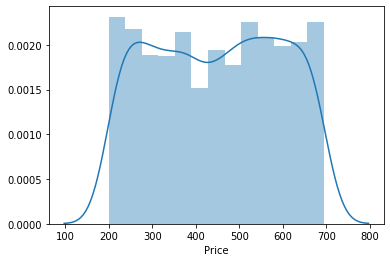

In [13]:
sns.distplot(df.Price)

In [14]:
print('Catagory column with null values',df[df['catagory'].isnull()].shape)

Catagory column with null values (1591, 8)


### There exist too many null values for column catagory lets fill them


In [15]:
l = ['Cookie','Cookies','cookie','cookies']

for i in range(df.shape[0]):
    
    s = df.loc[i,'Name'].split()
    for j in s:
        if j in l:
            df.loc[i,'catagory'] = 'cookie'
df[df['catagory']=='cookie']
df[df['catagory']=='cookie'].shape

(36, 8)

In [16]:
l = ['Paneer','paneer']

for i in range(df.shape[0]):
    
    s = df.loc[i,'Name'].split()
    for j in s:
        if j in l:
            df.loc[i,'catagory'] = 'paneer'
df[df['catagory']=='paneer'].shape

(19, 8)

In [17]:
l = ['Salad','salad']

for i in range(df.shape[0]):
    
    s = df.loc[i,'Name'].split()
    for j in s:
        if j in l:
            df.loc[i,'catagory'] = 'salad'
df[df['catagory']=='salad'].shape

(21, 8)

In [18]:
l = ['Thandai','thandai']

for i in range(df.shape[0]):
    
    s = df.loc[i,'Name'].split()
    for j in s:
        if j in l:
            df.loc[i,'catagory'] = 'thandai'
df[df['catagory']=='thandai'].shape

(18, 8)

In [19]:
l = ['milk','Milk']

for i in range(df.shape[0]):
    
    s = df.loc[i,'Name'].split()
    for j in s:
        if j in l:
            df.loc[i,'catagory'] = 'milk'
df[df['catagory']=='milk'].shape

(4, 8)

In [20]:
l = ['soup','Soup']

for i in range(df.shape[0]):
    
    s = df.loc[i,'Name'].split()
    for j in s:
        if j in l:
            df.loc[i,'catagory'] = 'soup'
df[df['catagory']=='soup'].shape

(20, 8)

In [21]:
l = ['margarita','Margarita']

for i in range(df.shape[0]):
    
    s = df.loc[i,'Name'].split()
    for j in s:
        if j in l:
            df.loc[i,'catagory'] = 'margarita'
df[df['catagory']=='margarita'].shape

(8, 8)

In [22]:
l = ['Tea','tea','chai','Chai']

for i in range(df.shape[0]):
    
    s = df.loc[i,'Name'].split()
    for j in s:
        if j in l:
            df.loc[i,'catagory'] = 'tea'
df[df['catagory']=='tea'].shape

(9, 8)

In [23]:
l = ['ESPRESSO','CAPPUCCINO','CAFÉ LATTE','MACCHIATO','AMERICANO','DECAFFEINATED','Coffee','CAFÉ LATTE']

for i in range(df.shape[0]):
    
    s = df.loc[i,'Name'].split()
    for j in s:
        if j in l:
            df.loc[i,'catagory'] = 'coffee'
df[df['catagory']=='coffee'].shape

(9, 8)

In [24]:
l = ['Wine','wine']

for i in range(df.shape[0]):
    
    s = df.loc[i,'Name'].split()
    for j in s:
        if j in l:
            df.loc[i,'catagory'] = 'wine'
df[df['catagory']=='wine'].shape

(5, 8)

In [25]:
l = ['Cake','cake']

for i in range(df.shape[0]):
    
    s = df.loc[i,'Name'].split()
    for j in s:
        if j in l:
            df.loc[i,'catagory'] = 'cake'
df[df['catagory']=='cake'].shape

(44, 8)

putting catagory like this really dosent make any sense , lets find out the most occouring words from name and assign them as catagory

In [26]:
from collections import Counter
l = []
for i in range(df.shape[0]):
    s = df.loc[i,'Name'].split()
    for j in s:
        l.append(j.lower())
    
d = Counter(l)
print(sorted(d.items(),key = lambda x:x[1],reverse=True))

[('and', 101), ('chicken', 93), ('with', 76), ('ki', 66), ('almond', 55), ('chocolate', 54), ('ka', 52), ('kheer', 46), ('cake', 44), ('curry', 40), ('rice', 40), ('biryani', 40), ('halwa', 37), ('fish', 35), ('aloo', 35), ('mutton', 34), ('cookies', 33), ('baked', 32), ('&amp;', 32), ('kebab', 29), ('christmas', 27), ('ladoo', 27), ('badam', 25), ('strawberry', 25), ('apple', 25), ('salad', 21), ('tikka', 21), ('lamb', 20), ('soup', 20), ('banana', 20), ('vada', 20), ('bread', 20), ('sauce', 19), ('kaju', 19), ('paneer', 19), ('prawn', 19), ('aur', 18), ('barfi', 18), ('puri', 18), ('mango', 18), ('thandai', 18), ('masala', 18), ('coconut', 17), ('dahi', 17), ('fried', 17), ('pizza', 17), ('roll', 17), ('fruit', 17), ('ragi', 16), ('phirni', 16), ('red', 16), ('modak', 16), ('rasmalai', 16), ('grilled', 15), ('vegetable', 15), ('dal', 15), ('malai', 15), ('gosht', 15), ('lemon', 14), ('kofta', 14), ('gujiya', 14), ('pasta', 14), ('ke', 14), ('of', 13), ('white', 13), ('pulao', 13), ('

lets take values with count > 5

In [27]:
l = [i[0] for i in sorted(d.items(),key = lambda x:x[1],reverse=True) if i[1]>5]
print(l)

['and', 'chicken', 'with', 'ki', 'almond', 'chocolate', 'ka', 'kheer', 'cake', 'curry', 'rice', 'biryani', 'halwa', 'fish', 'aloo', 'mutton', 'cookies', 'baked', '&amp;', 'kebab', 'christmas', 'ladoo', 'badam', 'strawberry', 'apple', 'salad', 'tikka', 'lamb', 'soup', 'banana', 'vada', 'bread', 'sauce', 'kaju', 'paneer', 'prawn', 'aur', 'barfi', 'puri', 'mango', 'thandai', 'masala', 'coconut', 'dahi', 'fried', 'pizza', 'roll', 'fruit', 'ragi', 'phirni', 'red', 'modak', 'rasmalai', 'grilled', 'vegetable', 'dal', 'malai', 'gosht', 'lemon', 'kofta', 'gujiya', 'pasta', 'ke', 'of', 'white', 'pulao', 'methi', '(laddu)', 'sweet', 'poha', 'butter', 'dosa', 'carrot', 'chaat', 'spiced', 'meat', 'jamun', 'kebabs', 'kulfi', 'gajar', 'in', 'korma', 'pista', 'gulab', 'khichdi', 'palak', 'roti', 'roast', 'tikki', 'tricolor', 'thai', 'cheese', 'matar', 'smoothie', 'cranberry', 'raw', 'kesari', 'sabudana', 'rabdi', 'fudge', 'berry', 'andhra', 'seekh', 'fizz', 'coffee', 'maas', 'paratha', 'summer', 'crea

In [28]:
l = ['chicken', 'almond', 'chocolate', 'kheer', 'cake', 'curry', 'rice', 'biryani', 'halwa', 'fish', 'aloo', 'mutton',
    
     'cookies', 'baked', 'kebab', 'christmas', 'ladoo', 'badam', 'strawberry', 'apple', 'salad', 'tikka', 'lamb',
     
     'soup', 'banana', 'vada', 'bread', 'sauce', 'kaju', 'paneer', 'prawn', 'barfi', 'mango', 'thandai', 'coconut',
     
     'dahi', 'pizza', 'modak', 'rasmalai', 'dal', 'malai', 'gosht', 'kofta', 'gujiya', 'pasta', 
     
     'pulao', 'methi',  'poha', 'butter', 'dosa', 'carrot', 'chaat','kebabs', 'kulfi', 'gajar',
     
     'korma', 'pista', 'gulab', 'khichdi', 'palak', 'roti', 'roast', 'tikki','cheese', 'matar', 'smoothie',
     
     'cranberry', 'sabudana', 'rabdi', 'berry', 'coffee','paratha', 'walnut', 'spicy', 'potato', 'beetroot',
     
      'anjeer', 'samosa', 'kachori', 'gulkand', 'risotto', 'margarita','honey', 'corn', 'nuts', 'roasted', 
     
      'spinach', 'sev','cardamom', 'dome', 'sangria','chawal', 'arbi', 'mushroom', 'tea', 'egg', 'pie',
     
      'parantha', 'kulcha', 'khaja', 'rabri', 'jalebi', 'bhaji','chilli', 'tricolour', 'chikki', 'zucchini',
     
     'gluten-free', 'barley', 'raspberry', 'chakli', 'dip', 'shankarpali', 'dessert', 'cashew', 'tomato', 'soya',
     
     'stuffed', 'chana', 'steam', 'bao', 'peda', 'tiranga', 'pav', 'idli', 'seed', 'saffron', 'love', 'chutney',
     
     'cocktail', 'mint', 'garlic', 'turkey', 'microwave', 'wrapped', 'keema', 'shami',
     
     'ghevar', 'pancakes', 'pudding', 'papad',]


for i in range(df.shape[0]):
    
    if str(df.loc[i,'catagory']) == 'nan':
        s = df.loc[i,'Name'].split()
        for j in s:
            if j.lower() in l:
                df.loc[i,'catagory'] = j.lower()
        

In [29]:
print('Catagory column with null values',df[df['catagory'].isnull()].shape)

Catagory column with null values (606, 8)


still there are many lets take more

In [30]:
from collections import Counter
l = []
for i in range(df.shape[0]):
    s = df.loc[i,'Name'].split()
    for j in s:
        l.append(j.lower())
    
d = Counter(l)
sorted(d.items(),key = lambda x:x[1],reverse=True)
l = [i[0] for i in sorted(d.items(),key = lambda x:x[1],reverse=True) if i[1]<5 and i[1]>2]
print(l)


['minced', 'sakkarai', 'japanese', 'arancini', 'broccoli', 'on', 'shorba', 'gluten', 'galawat', 'namakpara', 'checkerboard', 'multigrain', 'murukku', 'scotch', 'lentil', 'kahwa', 'kiwi', 'oats', 'wings', 'classic', 'momos', '(without', 'shell)', 'gajak', 'ca', 'cang', 'kho', 'yera', 'sukha', 'salmon', 'tulsi', 'ajwain', 'kalmi', 'pesto', 'reshmi', 'bites', 'vegetarian', 'appam', 'basil', 'pithe', 'warm', 'kinnu', 'punch', 'slow', 'cooked', 'fig', 'holi', 'special', 'spanish', 'milk', 'fresh', 'cappuccino', 'braised', 'plum', 'char', 'minar', 'raan', 'tawa', 'kadai', 'kofte', 'malabari', 'coriander', 'morning', 'greed', 'goan', 'masor', 'mousse', 'chingri', 'veg', 'pistachio', 'kalakand', '(vrat)', 'upma', 'dundee', 'balsamic', 'multi-layered', 'gehun', 'sushi', 'khoya', 'whole', 'breeze', 'panacotta', 'eggless', 'easter', 'kashmiri', 'khus', 'besan', 'sohan', 'panjiri', 'malpua', 'payesh', 'imarti', 'atte', 'petha', 'omelette', 'no', 'laddu', 'chhena', 'almonds', 'chargrilled', 'bell',

In [31]:
l = ['broccoli',  'shorba', 'gluten', 'scotch', 'lentil', 'kahwa', 'kiwi', 'oats', 'wings', 'momos',
     
     'gajak','salmon', 'appam', 'basil', 'pithe', 'warm', 'kinnu', 'punch', 'spanish', 'milk', 'fresh', 'cappuccino',
     
      'plum','tawa', 'kadai', 'kofte', 'malabari', 'coriander','pistachio', 'kalakand', '(vrat)', 'upma', 'dundee',
     
     'gehun', 'sushi', 'khoya','panacotta', 'eggless', 'easter', 'kashmiri', 'khus', 'besan', 'sohan', 'panjiri',
     
     'malpua', 'payesh', 'imarti', 'atte', 'petha', 'omelette','laddu', 'chhena', 'almonds', 'chargrilled', 'bell',
     
     'glazed', 'watermelon', 'polenta', 'recipe', 'som', 'tam', 'tangy', 'amaranth', 'moong', 'missi', 
     
     'quesadilla', 'dragon', 'fire', 'argentino', 'belgian', 'chop', 'moonglet', 'lasooni', 
     
      'pakori', 'zaitooni', 'croquettes','gujiyas', 'hariyali', 'apricot', 'gokul', 'shower', 'devils', 'onion',
     
     'gur', 'maple', 'ice', 'desi', 'gobhi', 'mastani', 'drink', 'hot', 'mocha', 'whisky', 'bourbon', 'irish',
     
     'boondi','amritsari', 'cauliflower', 'rum', 'fritters', 'seared', 'crab', 'cajun', 'bacon', 'mongolian', 
     
     
     
     'rava', 'pineapple', 'bruschetta', 'breton', 'luchi',
     
     'parotta', 'poppy', 'brownie', 'macaroons', 'crunch','turkish','vanilla', 'cinnamon', 'cookie', 'indian',
     
     'bedmi', 'raseele', 'suji', 'zaffrani', 'nariyal', 'aanarsa', 'assorted', 'yogurt', 'creamy', 'sheer',
     
     'pakode', 'kele', 'thepla', 'bonda', 'singhare', 'jalapeno', 'makki', 'chole', 'daal', 'pani', 'keerai',
     
     'vadi', 'basundi', 'dhokli', 'dhokla', 'pohe', 'papdi', 'ras']

for i in range(df.shape[0]):
    
    if str(df.loc[i,'catagory']) == 'nan':
        s = df.loc[i,'Name'].split()
        for j in s:
            if j.lower() in l:
                df.loc[i,'catagory'] = j.lower()
                
print('Catagory column with null values',df[df['catagory'].isnull()].shape)

Catagory column with null values (469, 8)


### lets fill others by using description

In [32]:
l = ['chicken', 'almond', 'chocolate', 'kheer', 'cake', 'curry', 'rice', 'biryani', 'halwa', 'fish', 'aloo', 'mutton',
    
     'cookies', 'baked', 'kebab', 'christmas', 'ladoo', 'badam', 'strawberry', 'apple', 'salad', 'tikka', 'lamb',
     
     'soup', 'banana', 'vada', 'bread', 'sauce', 'kaju', 'paneer', 'prawn', 'barfi', 'mango', 'thandai', 'coconut',
     
     'dahi', 'pizza', 'modak', 'rasmalai', 'dal', 'malai', 'gosht', 'kofta', 'gujiya', 'pasta', 
     
     'pulao', 'methi',  'poha', 'butter', 'dosa', 'carrot', 'chaat','kebabs', 'kulfi', 'gajar',
     
     'korma', 'pista', 'gulab', 'khichdi', 'palak', 'roti', 'roast', 'tikki','cheese', 'matar', 'smoothie',
     
     'cranberry', 'sabudana', 'rabdi', 'berry', 'coffee','paratha', 'walnut', 'spicy', 'potato', 'beetroot',
     
      'anjeer', 'samosa', 'kachori', 'gulkand', 'risotto', 'margarita','honey', 'corn', 'nuts', 'roasted', 
     
      'spinach', 'sev','cardamom', 'dome', 'sangria','chawal', 'arbi', 'mushroom', 'tea', 'egg', 'pie',
     
      'parantha', 'kulcha', 'khaja', 'rabri', 'jalebi', 'bhaji','chilli', 'tricolour', 'chikki', 'zucchini',
     
     'gluten-free', 'barley', 'raspberry', 'chakli', 'dip', 'shankarpali', 'dessert', 'cashew', 'tomato', 'soya',
     
     'stuffed', 'chana', 'steam', 'bao', 'peda', 'tiranga', 'pav', 'idli', 'seed', 'saffron', 'love', 'chutney',
     
     'cocktail', 'mint', 'garlic', 'turkey', 'microwave', 'wrapped', 'keema', 'shami',
     
     'ghevar', 'pancakes', 'pudding', 'papad',]

for i in range(df.shape[0]):
    
    if str(df.loc[i,'catagory']) == 'nan':
        if len(str(df.loc[i,'description']))>2:
            s = str(df.loc[i,'description']).split()
            for j in s:
                if j.lower() in l:
                    df.loc[i,'catagory'] = j.lower()

In [33]:
print('Catagory column with null values',df[df['catagory'].isnull()].shape)

Catagory column with null values (242, 8)


In [34]:
l = ['broccoli',  'shorba', 'gluten', 'scotch', 'lentil', 'kahwa', 'kiwi', 'oats', 'wings', 'momos',
     
     'gajak','salmon', 'appam', 'basil', 'pithe', 'warm', 'kinnu', 'punch', 'spanish', 'milk', 'fresh', 'cappuccino',
     
      'plum','tawa', 'kadai', 'kofte', 'malabari', 'coriander','pistachio', 'kalakand', '(vrat)', 'upma', 'dundee',
     
     'gehun', 'sushi', 'khoya','panacotta', 'eggless', 'easter', 'kashmiri', 'khus', 'besan', 'sohan', 'panjiri',
     
     'malpua', 'payesh', 'imarti', 'atte', 'petha', 'omelette','laddu', 'chhena', 'almonds', 'chargrilled', 'bell',
     
     'glazed', 'watermelon', 'polenta', 'recipe', 'som', 'tam', 'tangy', 'amaranth', 'moong', 'missi', 
     
     'quesadilla', 'dragon', 'fire', 'argentino', 'belgian', 'chop', 'moonglet', 'lasooni', 
     
      'pakori', 'zaitooni', 'croquettes','gujiyas', 'hariyali', 'apricot', 'gokul', 'shower', 'devils', 'onion',
     
     'gur', 'maple', 'ice', 'desi', 'gobhi', 'mastani', 'drink', 'hot', 'mocha', 'whisky', 'bourbon', 'irish',
     
     'boondi','amritsari', 'cauliflower', 'rum', 'fritters', 'seared', 'crab', 'cajun', 'bacon', 'mongolian', 
     
     
     
     'rava', 'pineapple', 'bruschetta', 'breton', 'luchi',
     
     'parotta', 'poppy', 'brownie', 'macaroons', 'crunch','turkish','vanilla', 'cinnamon', 'cookie', 'indian',
     
     'bedmi', 'raseele', 'suji', 'zaffrani', 'nariyal', 'aanarsa', 'assorted', 'yogurt', 'creamy', 'sheer',
     
     'pakode', 'kele', 'thepla', 'bonda', 'singhare', 'jalapeno', 'makki', 'chole', 'daal', 'pani', 'keerai',
     
     'vadi', 'basundi', 'dhokli', 'dhokla', 'pohe', 'papdi', 'ras']
for i in range(df.shape[0]):
    
    if str(df.loc[i,'catagory']) == 'nan':
        if len(str(df.loc[i,'description']))>2:
            s = str(df.loc[i,'description']).split()
            for j in s:
                if j.lower() in l:
                    df.loc[i,'catagory'] = j.lower()

In [35]:
print('Catagory column with null values',df[df['catagory'].isnull()].shape)

Catagory column with null values (200, 8)


### Clearly we have a fine dataset to works with
- we can fill columns like sub_catagory as we did for catagory
- Also we can fill nutrient column by the help of name and catagory and their nutrient
- try it out!

In [36]:
df.head(10)

,Name,catagory,description,sub_catagory,Veg_Non,Review,Nutrient,Price
0,Summer Squash Salad,salad,"Key Ingredients: white balsamic vinegar, lemon...",healthy,veg,5,Fiber,230
1,Chicken Minced Salad,salad,"Key Ingredients: olive oil, chicken mince, gar...",healthy,non-veg,3,Fiber,265
2,Sweet Chilli Almonds,chilli,"Key Ingredients: almonds whole, egg white, cur...",healthy,veg,2,Vitamin_A,200
3,Tricolour Salad,salad,"Key Ingredients: vinegar, honey/sugar, soy sau...",healthy,veg,2,Fiber,220
4,Sakkarai Pongal,coconut,"Key Ingredients: rice, yellow moong dal, milk,...",healthy,veg,1,NaN,470
5,Gulab Badam Chikki,chikki,"Key Ingredients: butter, sugar, salt, almonds,...",healthy,veg,3,NaN,405
6,Zucchini Halwa,halwa,"Key Ingredients: zucchini, full fat milk, ghee...",healthy,veg,4,NaN,595
7,Gluten-Free Christmas Cake,cake,Key Ingredients: Christmas dry fruits (pre-soa...,healthy,veg,3,Vitamin_A,270
8,Japanese Curry Arancini With Barley Salsa,barley,"Key Ingredients: japanese curry, sticky rice, ...",healthy,veg,5,Calcium,255
9,Chocolate Nero Cookies,cookie,"Key Ingredients: almonds, eggs, granulated sug...",healthy,veg,2,Magnesium,255


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1951 entries, 0 to 1950
Data columns (total 8 columns):
Name            1951 non-null object
catagory        1751 non-null object
description     1815 non-null object
sub_catagory    1181 non-null object
Veg_Non         1951 non-null object
Review          1951 non-null int64
Nutrient        1174 non-null object
Price           1951 non-null int64
dtypes: int64(2), object(6)
memory usage: 122.0+ KB


In [38]:
df.describe(include='all')

,Name,catagory,description,sub_catagory,Veg_Non,Review,Nutrient,Price
count,1951,1751,1815,1181,1951,1951.000000,1174,1951.000000
unique,1278,211,1286,16,2,NaN,19,NaN
top,Red Rice Vermicelli Kheer,rice,Sweet,desserts,veg,NaN,Iron,NaN
freq,7,121,16,156,1646,NaN,242,NaN
mean,NaN,NaN,NaN,NaN,NaN,3.062532,NaN,448.275243
std,NaN,NaN,NaN,NaN,NaN,1.421875,NaN,146.468201
min,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,200.000000
25%,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,320.000000
50%,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,455.000000
75%,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,575.000000


lets save our data

In [39]:
df[df.Nutrient.isnull()].shape

(777, 8)

In [40]:
df = df[df['Nutrient'].notna()]
df = df[df['description'].notna()]

description = []
for i in df.description:
    description.append(i[16:])
df['description'] = description

In [41]:
name = []
for i in df.Name:
    name.append(i.strip())
df['Name'] = name

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1108 entries, 0 to 1947
Data columns (total 8 columns):
Name            1108 non-null object
catagory        1091 non-null object
description     1108 non-null object
sub_catagory    709 non-null object
Veg_Non         1108 non-null object
Review          1108 non-null int64
Nutrient        1108 non-null object
Price           1108 non-null int64
dtypes: int64(2), object(6)
memory usage: 77.9+ KB


In [43]:
df.to_csv('dataset.csv')

In [44]:
df.head()

,Name,catagory,description,sub_catagory,Veg_Non,Review,Nutrient,Price
0,Summer Squash Salad,salad,"white balsamic vinegar, lemon juice, lemon ri...",healthy,veg,5,Fiber,230
1,Chicken Minced Salad,salad,"olive oil, chicken mince, garlic (minced), on...",healthy,non-veg,3,Fiber,265
2,Sweet Chilli Almonds,chilli,"almonds whole, egg white, curry leaves, salt,...",healthy,veg,2,Vitamin_A,200
3,Tricolour Salad,salad,"vinegar, honey/sugar, soy sauce, salt, garlic...",healthy,veg,2,Fiber,220
7,Gluten-Free Christmas Cake,cake,"Christmas dry fruits (pre-soaked), orange zes...",healthy,veg,3,Vitamin_A,270
